In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [2]:
ca_plotting = pd.read_csv('Data_Marketing_Customer_Analysis_Round2.csv')

In [3]:
def drop_columns(ca_plotting) :
    ca_plotting.drop(columns=["Unnamed: 0"], inplace=True)
    return ca_plotting

In [4]:
drop_columns(ca_plotting)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [5]:
ca_objects = ca_plotting.select_dtypes(include=['object'])

In [6]:
ca_objects

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [7]:
ca_floats = ca_plotting.select_dtypes(include=['float64'])
ca_floats

,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,4809.216960,7.0,0.0,292.800000
1,2228.525238,3.0,0.0,744.924331
2,14947.917300,34.0,0.0,480.000000
3,22332.439460,10.0,0.0,484.013411
4,9025.067525,NaN,NaN,707.925645
...,...,...,...,...
10905,15563.369440,NaN,NaN,1214.400000
10906,5259.444853,7.0,0.0,273.018929
10907,23893.304100,11.0,0.0,381.306996
10908,11971.977650,0.0,4.0,618.288849


In [8]:
ca_integers = ca_plotting.select_dtypes(include=['int64'])
ca_integers

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies
0,48029,61,52,9
1,0,64,26,1
2,22139,100,31,2
3,49078,97,3,2
4,23675,117,31,7
...,...,...,...,...
10905,0,253,40,7
10906,61146,65,68,6
10907,39837,201,63,2
10908,64195,158,27,6


In [9]:
ca_numerical = pd.concat([ca_integers,ca_floats], axis=1)
ca_numerical

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,48029,61,52,9,4809.216960,7.0,0.0,292.800000
1,0,64,26,1,2228.525238,3.0,0.0,744.924331
2,22139,100,31,2,14947.917300,34.0,0.0,480.000000
3,49078,97,3,2,22332.439460,10.0,0.0,484.013411
4,23675,117,31,7,9025.067525,NaN,NaN,707.925645
...,...,...,...,...,...,...,...,...
10905,0,253,40,7,15563.369440,NaN,NaN,1214.400000
10906,61146,65,68,6,5259.444853,7.0,0.0,273.018929
10907,39837,201,63,2,23893.304100,11.0,0.0,381.306996
10908,64195,158,27,6,11971.977650,0.0,4.0,618.288849


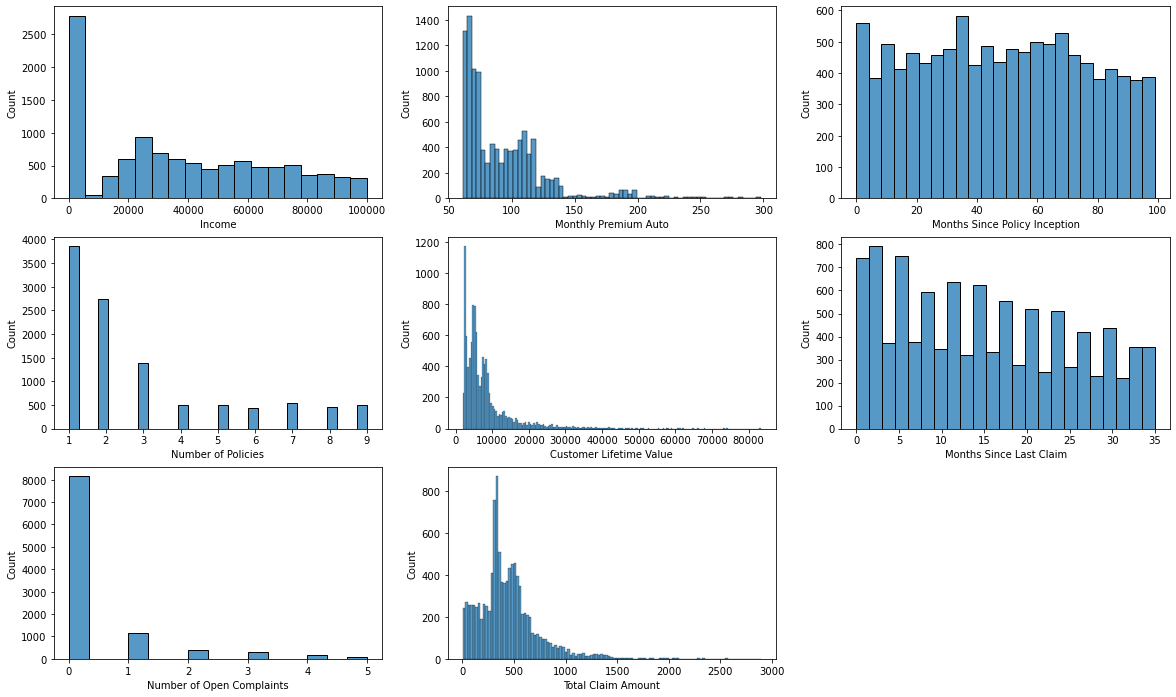

In [10]:
plt.figure(figsize=(20,12))
for i, column in enumerate(ca_numerical.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(ca_numerical[column])

In [11]:
#ca_numerical['Income']=ca_numerical['Income'].replace(0,np.nan)

<AxesSubplot:xlabel='Income', ylabel='Count'>

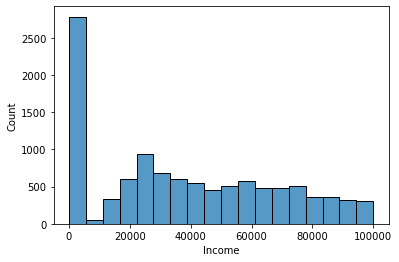

In [12]:
sns.histplot(ca_numerical['Income'])

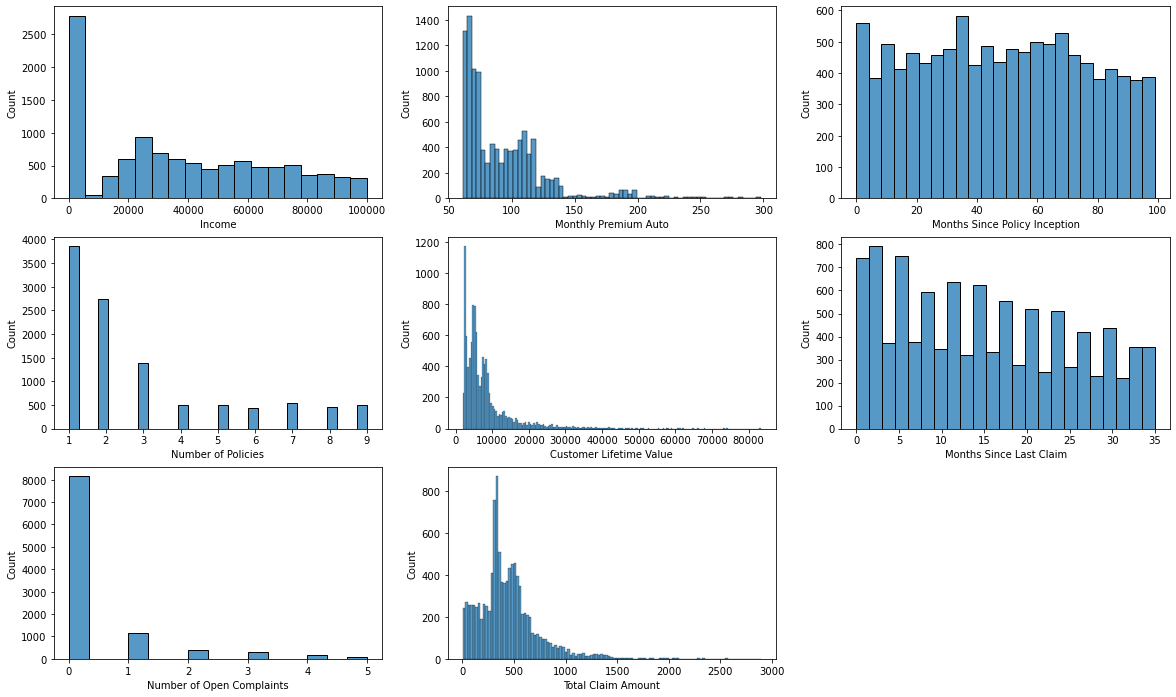

In [13]:
plt.figure(figsize=(20,12))
for i, column in enumerate(ca_numerical.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(ca_numerical[column])

In [14]:
from sklearn.preprocessing import QuantileTransformer


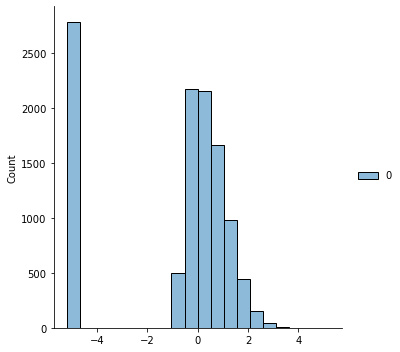

In [15]:
qt = QuantileTransformer(output_distribution='normal')
normalized_income=qt.fit_transform(ca_plotting['Income'].to_numpy().reshape(-1,1))
sns.displot(normalized_income)